In [1]:
# GPU setting
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

# modules setting

import numpy as np
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import datetime
from utils import one_hot, train_valid_split, random_minibatch, shuffle
from utils import training_history

# Load Data

In [5]:
train_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT/8ch/train'
npy_files = os.listdir(train_dir)
npy_files

['ball_7.npy',
 'ball_14.npy',
 'ball_21.npy',
 'inner_7.npy',
 'inner_14.npy',
 'inner_21.npy',
 'outer_7.npy',
 'outer_14.npy',
 'outer_21.npy',
 'normal.npy']

In [6]:
normal = np.load(os.path.join(train_dir, str([i for i in npy_files if 'normal' in i][0])))
ball_7 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'ball_7' in i][0])))
ball_14 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'ball_14' in i][0])))
ball_21 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'ball_21' in i][0])))
inner_7 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'inner_7' in i][0])))
inner_14 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'inner_14' in i][0])))
inner_21 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'inner_21' in i][0])))
outer_7 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'outer_7' in i][0])))
outer_14 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'outer_14' in i][0])))
outer_21 = np.load(os.path.join(train_dir, str([i for i in npy_files if 'outer_21' in i][0])))

normal_y = one_hot(normal, 0, nb_classes = 10)
ball_7_y = one_hot(ball_7, 1, nb_classes = 10)
ball_14_y = one_hot(ball_14, 2, nb_classes = 10)
ball_21_y = one_hot(ball_21, 3, nb_classes = 10)
inner_7_y = one_hot(inner_7, 4, nb_classes = 10)
inner_14_y = one_hot(inner_14, 5, nb_classes = 10)
inner_21_y = one_hot(inner_21, 6, nb_classes = 10)
outer_7_y = one_hot(outer_7, 7, nb_classes = 10)
outer_14_y = one_hot(outer_14, 8, nb_classes = 10)
outer_21_y = one_hot(outer_21, 9, nb_classes = 10)

print("normal:", normal.shape, normal_y.shape)
print("ball_7:", ball_7.shape, ball_7_y.shape)
print("ball_14:", ball_14.shape, ball_14_y.shape)
print("ball_21:", ball_21.shape, ball_21_y.shape)
print("inner_7:", inner_7.shape, inner_7_y.shape)
print("inner_14:", inner_14.shape, inner_14_y.shape)
print("inner_21:", inner_21.shape, inner_21_y.shape)
print("outer_7:", outer_7.shape, outer_7_y.shape)
print("outer_14:", outer_14.shape, outer_14_y.shape)
print("outer_21:", outer_21.shape, outer_21_y.shape)

normal: (750, 100, 100, 8) (750, 10)
ball_7: (750, 100, 100, 8) (750, 10)
ball_14: (750, 100, 100, 8) (750, 10)
ball_21: (750, 100, 100, 8) (750, 10)
inner_7: (750, 100, 100, 8) (750, 10)
inner_14: (750, 100, 100, 8) (750, 10)
inner_21: (750, 100, 100, 8) (750, 10)
outer_7: (750, 100, 100, 8) (750, 10)
outer_14: (750, 100, 100, 8) (750, 10)
outer_21: (750, 100, 100, 8) (750, 10)


# Data split

In [7]:
normal_train_x, normal_train_y, normal_valid_x, normal_valid_y = train_valid_split(normal, normal_y)
print("normal:", normal_train_x.shape, normal_train_y.shape, normal_valid_x.shape, normal_valid_y.shape)

ball_7_train_x, ball_7_train_y, ball_7_valid_x, ball_7_valid_y = train_valid_split(ball_7, ball_7_y)
ball_14_train_x, ball_14_train_y, ball_14_valid_x, ball_14_valid_y = train_valid_split(ball_14, ball_14_y)
ball_21_train_x, ball_21_train_y, ball_21_valid_x, ball_21_valid_y = train_valid_split(ball_21, ball_21_y)
print("ball_7:", ball_7_train_x.shape, ball_7_train_y.shape, ball_7_valid_x.shape, ball_7_valid_y.shape)
print("ball_14:", ball_14_train_x.shape, ball_14_train_y.shape, ball_14_valid_x.shape, ball_14_valid_y.shape)
print("ball_21:", ball_21_train_x.shape, ball_21_train_y.shape, ball_21_valid_x.shape, ball_21_valid_y.shape)

inner_7_train_x, inner_7_train_y, inner_7_valid_x, inner_7_valid_y = train_valid_split(inner_7, inner_7_y)
inner_14_train_x, inner_14_train_y, inner_14_valid_x, inner_14_valid_y = train_valid_split(inner_14, inner_14_y)
inner_21_train_x, inner_21_train_y, inner_21_valid_x, inner_21_valid_y = train_valid_split(inner_21, inner_21_y)
print("inner_7:", inner_7_train_x.shape, inner_7_train_y.shape, inner_7_valid_x.shape, inner_7_valid_y.shape)
print("inner_14:", inner_14_train_x.shape, inner_14_train_y.shape, inner_14_valid_x.shape, inner_14_valid_y.shape)
print("inner_21:", inner_21_train_x.shape, inner_21_train_y.shape, inner_21_valid_x.shape, inner_21_valid_y.shape)

outer_7_train_x, outer_7_train_y, outer_7_valid_x, outer_7_valid_y = train_valid_split(outer_7, outer_7_y)
outer_14_train_x, outer_14_train_y, outer_14_valid_x, outer_14_valid_y = train_valid_split(outer_14, outer_14_y)
outer_21_train_x, outer_21_train_y, outer_21_valid_x, outer_21_valid_y = train_valid_split(outer_21, outer_21_y)
print("outer_7:", outer_7_train_x.shape, outer_7_train_y.shape, outer_7_valid_x.shape, outer_7_valid_y.shape)
print("outer_14:", outer_14_train_x.shape, outer_14_train_y.shape, outer_14_valid_x.shape, outer_14_valid_y.shape)
print("outer_21:", outer_21_train_x.shape, outer_21_train_y.shape, outer_21_valid_x.shape, outer_21_valid_y.shape)

normal: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
ball_7: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
ball_14: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
ball_21: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
inner_7: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
inner_14: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
inner_21: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
outer_7: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
outer_14: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)
outer_21: (638, 100, 100, 8) (638, 10) (112, 100, 100, 8) (112, 10)


In [8]:
train_X = np.vstack([normal_train_x, ball_7_train_x, ball_14_train_x, ball_21_train_x, 
                     inner_7_train_x, inner_14_train_x, inner_21_train_x,
                     outer_7_train_x, outer_14_train_x, outer_21_train_x, ])
train_Y = np.vstack([normal_train_y, ball_7_train_y, ball_14_train_y, ball_21_train_y, 
                     inner_7_train_y, inner_14_train_y, inner_21_train_y,
                     outer_7_train_y, outer_14_train_y, outer_21_train_y, ])
valid_X = np.vstack([normal_valid_x, ball_7_valid_x, ball_14_valid_x, ball_21_valid_x, 
                     inner_7_valid_x, inner_14_valid_x, inner_21_valid_x,
                     outer_7_valid_x, outer_14_valid_x, outer_21_valid_x, ])
valid_Y = np.vstack([normal_valid_y, ball_7_valid_y, ball_14_valid_y, ball_21_valid_y, 
                     inner_7_valid_y, inner_14_valid_y, inner_21_valid_y,
                     outer_7_valid_y, outer_14_valid_y, outer_21_valid_y, ])

print("Training set:", train_X.shape, train_Y.shape)
print("Validation set:", valid_X.shape, valid_Y.shape)

Training set: (6380, 100, 100, 8) (6380, 10)
Validation set: (1120, 100, 100, 8) (1120, 10)


# Model

In [10]:
input_h = 100
input_w = 100
input_ch = 8

ch_1 = 16
# 50 50 16

ch_2 = 32
# 25 25 32

ch_3 = 32
# 12 12 16

ch_4 = 64
# 6 6 32

ch_5 = 128
# 3 3 128

n_hidden_1 = 100
n_hidden_2 = 50
n_output = 10

In [16]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch], name = 'img')
y = tf.placeholder(tf.float32, [None, n_output], name = 'label')
#rate = tf.placeholder(tf.float32, name = 'rate') # tf.layers.dropout용 얼만큼 드랍아웃할건지
is_training = tf.placeholder(tf.bool, name = 'is_training')

class CapsuleNet:
    def __init__(self, ch_1, ch_2, ch_3, ch_4, ch_5, n_hidden_1, n_hidden_2, n_output):
        self.ch_1 = ch_1
        self.ch_2 = ch_2
        self.ch_3 = ch_3
        self.ch_4 = ch_4
        self.ch_5 = ch_5
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_output = n_output

    def cnn_block(self, x, k_channel, maxp_name = 'maxp'):
        conv1 = tf.layers.conv2d(inputs = x, 
                                 filters = k_channel, 
                                 kernel_size = [3, 3], 
                                 padding = "SAME",
                                 activation= tf.nn.relu)
        conv2 = tf.layers.conv2d(inputs = conv1, 
                                 filters = k_channel, 
                                 kernel_size = [3, 3], 
                                 padding = "SAME",
                                 activation= tf.nn.relu)
        maxp = tf.layers.max_pooling2d(inputs = conv2, 
                                       pool_size = [2, 2], 
                                       strides = 2,
                                       name = maxp_name)
        return maxp
    def fc2_layer(self, x, n_hidden1, n_hidden2, n_output, score_name = 'score'):
        maxp_re = tf.layers.flatten(x)
        hidden1 = tf.layers.dense(inputs = maxp_re, 
                                  units = n_hidden1,
                                  activation = tf.nn.relu)
        hidden1 = tf.layers.dropout(hidden1, rate = 0.3, training = is_training) # Drouout
        hidden2 = tf.layers.dense(inputs = hidden1, 
                                  units = n_hidden2,
                                  activation = tf.nn.relu)
        hidden2 = tf.layers.dropout(hidden2, rate = 0.3, training = is_training) # Drouout
        output = tf.layers.dense(inputs = hidden2, units = n_output, name = score_name)
        return output

    def inf(self, x):
        conv1 = self.cnn_block(x, self.ch_1, 'maxp1')
        conv2 = self.cnn_block(conv1, self.ch_2, 'maxp2')
        conv3 = self.cnn_block(conv2, self.ch_3, 'maxp3')
        conv4 = self.cnn_block(conv3, self.ch_4, 'maxp4')
        conv5 = self.cnn_block(conv4, self.ch_5, 'maxp5')
        score = self.fc2_layer(conv5, self.n_hidden_1, self.n_hidden_2, self.n_output, 'score')
        
        return score
    
model = CapsuleNet(ch_1, ch_2, ch_3, ch_4, ch_5, n_hidden_1, n_hidden_2, n_output)
score = model.inf(x)
loss = tf.losses.softmax_cross_entropy(onehot_labels=y, logits=score)
loss = tf.reduce_mean(loss)   

W1215 23:27:28.473310 140109056771840 deprecation.py:323] From <ipython-input-16-e55c4eeb3c4e>:24: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W1215 23:27:28.486540 140109056771840 deprecation.py:506] From /home/yunseob/.local/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1215 23:27:28.689501 140109056771840 deprecation.py:323] From <ipython-input-16-e55c4eeb3c4e>:33: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
W1215 23:27:28.905340 140109056771840 deprecati

# Training

[Iter] || Train_accr || Valid_accr || Train_loss || Valid_loss


W1215 23:49:01.154540 140109056771840 deprecation.py:323] From /home/yunseob/.local/lib/python3.5/site-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


[*100] || 25.00 %    || 37.50 %    || 1.64262509 || 1.62533569
--------------------------------------------------------------
[*200] || 100.00 %    || 75.00 %    || 0.27942002 || 0.89259088
--------------------------------------------------------------
[*300] || 50.00 %    || 87.50 %    || 0.92459345 || 0.82013988
--------------------------------------------------------------
[*400] || 100.00 %    || 100.00 %    || 0.22753233 || 0.31182295
--------------------------------------------------------------
[*500] || 87.50 %    || 100.00 %    || 0.52270037 || 0.08217824
--------------------------------------------------------------
[*600] || 100.00 %    || 100.00 %    || 0.13301241 || 0.02403416
--------------------------------------------------------------
[*700] || 100.00 %    || 100.00 %    || 0.06915487 || 0.01066063
--------------------------------------------------------------
[*800] || 100.00 %    || 100.00 %    || 0.06767149 || 0.15219457
---------------------------------------------

[6600] || 100.00 %    || 100.00 %    || 0.00003585 || 0.00001655
--------------------------------------------------------------
[6700] || 100.00 %    || 100.00 %    || 0.00000033 || 0.00000837
--------------------------------------------------------------
[6800] || 100.00 %    || 100.00 %    || 0.00000019 || 0.00000796
--------------------------------------------------------------
[6900] || 100.00 %    || 100.00 %    || 0.00000094 || 0.00000012
--------------------------------------------------------------
[7000] || 100.00 %    || 100.00 %    || 0.00010535 || 0.00000493
--------------------------------------------------------------
[7100] || 100.00 %    || 100.00 %    || 0.00000376 || 0.00000006
--------------------------------------------------------------
[7200] || 100.00 %    || 100.00 %    || 0.00001781 || 0.00000212
--------------------------------------------------------------
[7300] || 100.00 %    || 100.00 %    || 0.00002743 || 0.00001220
---------------------------------------

[13000] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
--------------------------------------------------------------
[13100] || 100.00 %    || 100.00 %    || 0.00000872 || 0.00000000
--------------------------------------------------------------
[13200] || 100.00 %    || 100.00 %    || 0.00007329 || 0.00026063
--------------------------------------------------------------
[13300] || 100.00 %    || 100.00 %    || 0.00000025 || 0.00000067
--------------------------------------------------------------
[13400] || 100.00 %    || 100.00 %    || 0.00000001 || 0.00000215
--------------------------------------------------------------
[13500] || 100.00 %    || 100.00 %    || 0.00000007 || 0.00000037
--------------------------------------------------------------
[13600] || 100.00 %    || 100.00 %    || 0.00000001 || 0.00000021
--------------------------------------------------------------
[13700] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000004
-------------------------------

[19400] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
--------------------------------------------------------------
[19500] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
--------------------------------------------------------------
[19600] || 100.00 %    || 100.00 %    || 0.02706639 || 0.00001977
--------------------------------------------------------------
[19700] || 100.00 %    || 100.00 %    || 0.00208781 || 0.00000061
--------------------------------------------------------------
[19800] || 100.00 %    || 100.00 %    || 0.00000089 || 0.00002332
--------------------------------------------------------------
[19900] || 100.00 %    || 100.00 %    || 0.00000280 || 0.00000007
--------------------------------------------------------------
[20000] || 100.00 %    || 100.00 %    || 0.00000006 || 0.00000003
--------------------------------------------------------------
[20100] || 100.00 %    || 100.00 %    || 0.00000021 || 0.00000000
-------------------------------

[25800] || 100.00 %    || 100.00 %    || 0.00016181 || 0.00000297
--------------------------------------------------------------
[25900] || 100.00 %    || 100.00 %    || 0.00008586 || 0.00000899
--------------------------------------------------------------
[26000] || 100.00 %    || 100.00 %    || 0.00010431 || 0.00009611
--------------------------------------------------------------
[26100] || 100.00 %    || 100.00 %    || 0.00000027 || 0.00000000
--------------------------------------------------------------
[26200] || 100.00 %    || 100.00 %    || 0.00000033 || 0.00000006
--------------------------------------------------------------
[26300] || 100.00 %    || 100.00 %    || 0.00000045 || 0.00000000
--------------------------------------------------------------
[26400] || 100.00 %    || 100.00 %    || 0.00000009 || 0.00000000
--------------------------------------------------------------
[26500] || 100.00 %    || 100.00 %    || 0.00000003 || 0.00000000
-------------------------------

[32200] || 100.00 %    || 100.00 %    || 0.00001550 || 0.00000000
--------------------------------------------------------------
[32300] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000067
--------------------------------------------------------------
[32400] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000028
--------------------------------------------------------------
[32500] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
--------------------------------------------------------------
[32600] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
--------------------------------------------------------------
[32700] || 100.00 %    || 100.00 %    || 0.00000016 || 0.00000000
--------------------------------------------------------------
[32800] || 100.00 %    || 100.00 %    || 0.00001277 || 0.00000004
--------------------------------------------------------------
[32900] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
-------------------------------

[38600] || 100.00 %    || 100.00 %    || 0.00000115 || 0.00000000
--------------------------------------------------------------
[38700] || 100.00 %    || 100.00 %    || 0.00000003 || 0.00000000
--------------------------------------------------------------
[38800] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
--------------------------------------------------------------
[38900] || 100.00 %    || 100.00 %    || 0.00000009 || 0.00000195
--------------------------------------------------------------
[39000] || 100.00 %    || 100.00 %    || 0.00000051 || 0.00000000
--------------------------------------------------------------
[39100] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
--------------------------------------------------------------
[39200] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
--------------------------------------------------------------
[39300] || 100.00 %    || 100.00 %    || 0.00000000 || 0.00000000
-------------------------------

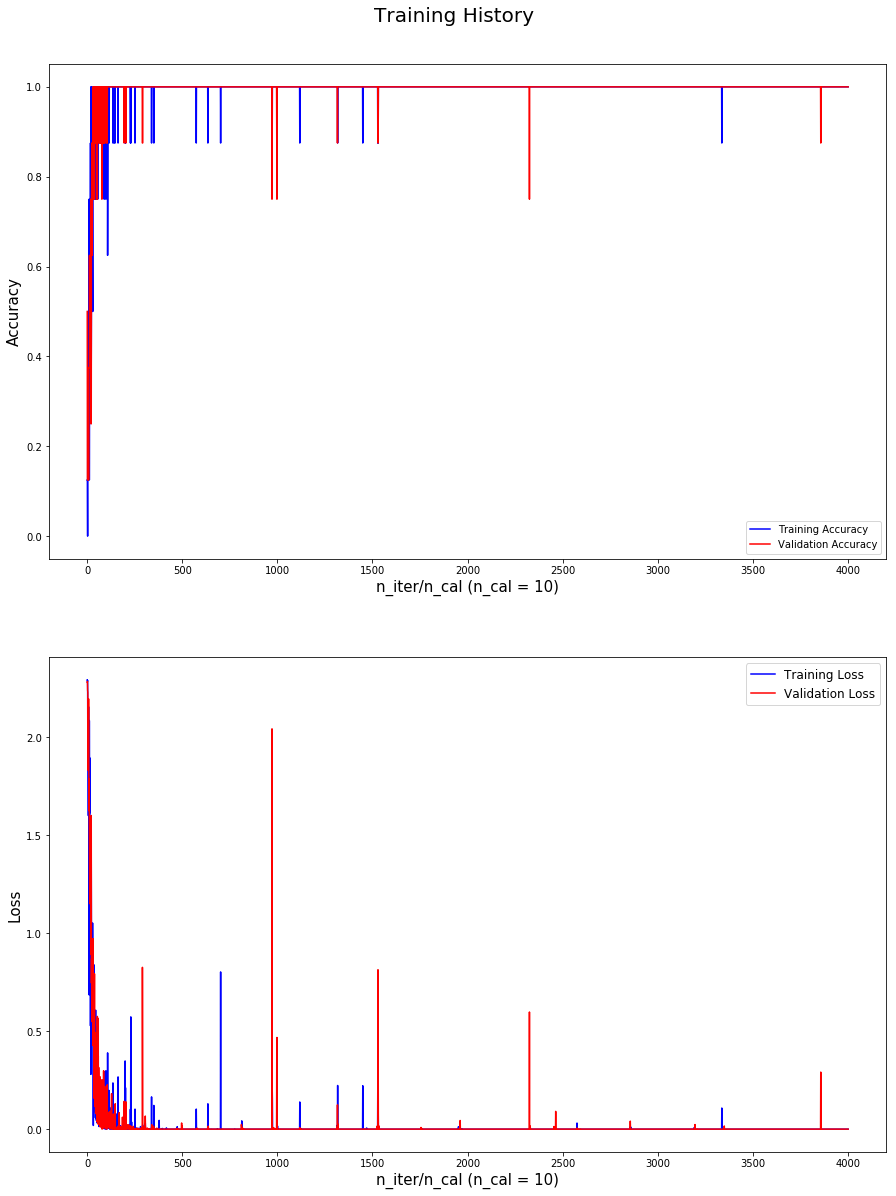

In [19]:
t_batch = 8
v_batch = 8
n_cal = 10
n_prt = 100

n_iter = 0

# LR = 1e-4 # 1e-4 ~ 5e-4 (xavier)
lr = 1e-4

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optm = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)
# optm = tf.train.AdamOptimizer(lr).minimize(loss)

saver = tf.train.Saver()
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)
start_time = time.time() 

accr_train, accr_valid, loss_train, loss_valid = [], [], [], []
early_stopping = False

hist = training_history(accr_train, accr_valid, loss_train, loss_valid)
hist.table()

while True:
    train_x, train_y = random_minibatch(train_X, train_Y, batch_size = t_batch)
#     train_n_x, train_n_y = random_minibatch(train_noise_X, train_noise_Y, batch_size = t_batch)
#     train_x, train_y = np.concatenate((train_x, train_n_x), axis = 0), np.concatenate((train_y, train_n_y), axis = 0)
    train_x, train_y = shuffle(train_x, train_y)
    
    sess.run(optm, feed_dict = {'img:0': train_x, 'label:0': train_y, 'is_training:0' :1})
    n_iter += 1
    if n_iter % n_cal == 0:
        c, p = sess.run([loss, score], feed_dict = {'img:0': train_x, 'label:0': train_y, 'is_training:0' :0})

        p = np.argmax(p, axis = 1)
        l = np.argmax(train_y, axis = 1)
        a = np.mean(np.equal(p, l))
        
        valid_x, valid_y = random_minibatch(valid_X, valid_Y, batch_size = v_batch)
#         valid_n_x, valid_n_y = random_minibatch(valid_noise_X, valid_noise_Y, batch_size = v_batch)
#         valid_x, valid_y = np.concatenate((valid_x, valid_n_x), axis = 0), np.concatenate((valid_y, valid_n_y), axis = 0)
        
        c_valid, p_valid = sess.run([loss, score], feed_dict = {'img:0': valid_x, 'label:0': valid_y, 'is_training:0' :0})

        p_valid = np.argmax(p_valid, axis = 1)
        l_valid = np.argmax(valid_y, axis = 1)
        a_valid = np.mean(np.equal(p_valid, l_valid))

        accr_valid.append(a_valid)
        loss_valid.append(c_valid)
        accr_train.append(a)
        loss_train.append(c)

        if n_iter % n_prt == 0:
            hist.prt_evl(n_iter)

        if loss_valid[-1] == np.min(loss_valid):
            now = datetime.datetime.now()
            nowDatetime = now.strftime('%y%m%d%H%M')
            model_name = 'hht_8ch_cap_{0}_{1}_val_acc_{2:.2f}_val_loss_{3:.6f}'.format(nowDatetime, n_iter, accr_valid[-1], loss_valid[-1])
            saver.save(sess, './model/HHT/' + model_name)
        if n_iter == 40000:
            break
#         if n_iter > 1000:
#             if np.max(accr_train) < 0.9:
#                 if np.mean(loss_train[-50:-30]) <= np.mean(loss_train[-30:]) :
#                     hist.early_under(n_iter)
#                     early_stopping = True
#                     break
#             if np.mean(accr_train[-50:]) >= 0.995:
#                 if (
#                     np.mean(loss_valid[-41:-21]) <= np.mean(loss_valid[-21:-1]) and
#                     loss_valid[-1] < loss_valid[-2] # np.min(loss_valid[-20:]) == loss_valid[-1]
#                     ):
#                     hist.early_over(n_iter)
#                     early_stopping = True
#                     break          

train_time = int((time.time() - start_time)/60)  
hist.done(n_iter, train_time, early_stopping)

np.save('/mnt/disk1/yunseob/courses/19-2_computer vision/history/CapNet_HHT_8ch_accr', np.array(accr_train))
np.save('/mnt/disk1/yunseob/courses/19-2_computer vision/history/CapNet_HHT_8ch_loss', np.array(loss_train))

hist.plot(n_cal)   

# sess.close()